In [20]:
options(warn = -1)

# Exploring Data

First, install the required R packages if not done already. See [Installing Required R Packages.](../00_Installing_Required_R_Packages.ipynb)

In this notebook we will explore our customer churn dataset to try to identify whether there are any meaningful relationships between our variables. We will also attempt to identify any data quality issues that will need to be addressed prior to developing machine learning models.

### Loading Libraries and Importing the Dataset

In the next section we will load the necessary libraries and import the dataset that will be used throughout this project.

In [21]:
library(tidyverse)
#library(gridExtra)
#library(corrplot)
#library(psych)
library(patchwork)

In [22]:
# Imports the dataset

#churn_df <- read.csv("../../data/output/customer_churn_abt.csv")
churn_df <- read.csv("/workspaces/myfolder/sas-hackathon-boot-camp-2025/workbench/Fall-Regional-Meetups/R_Examples/Machine Learning/new ipynb files/customer_churn_abt.csv")

### Basic Exploration

Explores some of the basic information pertaining to the data.

In [23]:
str(churn_df)

'data.frame':	5000 obs. of  30 variables:
 $ ID                    : int  9155 9160 9163 9170 9175 9190 9195 9198 9226 9235 ...
 $ LostCustomer          : int  0 0 0 0 0 0 0 0 1 0 ...
 $ regionPctCustomers    : int  43 19 19 33 22 30 27 38 22 37 ...
 $ numOfTotalReturns     : int  0 1 0 5 0 0 1 0 2 3 ...
 $ wksSinceLastPurch     : int  14 19 7 7 6 20 18 26 13 17 ...
 $ basktPurchCount12Month: int  10 3 10 2 10 5 3 10 3 1 ...
 $ LastPurchaseAmount    : num  50 50 50 50 50 55 70 90 50 100 ...
 $ AvgPurchaseAmount12   : num  0 62.5 0 40 0 ...
 $ AvgPurchaseAmountTotal: num  55.6 61.9 35.2 34.8 63 ...
 $ intAdExposureCount12  : int  27 13 32 31 40 29 13 26 29 10 ...
 $ intAdExposureCount36  : int  27 30 32 48 40 47 33 26 46 24 ...
 $ intAdExposureCountAll : int  58 61 95 78 126 124 67 76 118 58 ...
 $ socialMediaAdCount12  : int  3 6 4 4 8 5 5 5 6 4 ...
 $ socialMediaAdCount36  : int  3 14 4 14 8 5 14 5 14 13 ...
 $ socialMediaAdCountAll : int  10 20 28 20 27 29 24 21 30 19 ...
 $ totalNum

In [24]:
# Display the column variable types

churn_df <- churn_df %>% mutate_if(is.integer,as.numeric)

dtypes <- table(sapply(churn_df, typeof))
dtypes


character    double 
        5        25 

### Duplicate Rows

Checks and removes duplicate rows if they exists.

In [25]:
churn_df <- churn_df %>% distinct()
dim(churn_df)  

[1] 5000   30

### Exploring Distributions

In [26]:
# Displays summary statistics for the numeric columns
cat("\n---------- Variable Summary Statistics for numeric variables ----------\n\n")
summary(churn_df[sapply(churn_df, is.numeric)])
cat("\n\n")



---------- Variable Summary Statistics for numeric variables ----------



       ID          LostCustomer    regionPctCustomers numOfTotalReturns
 Min.   :   110   Min.   :0.0000   Min.   : 0.00      Min.   :0.000    
 1st Qu.: 44128   1st Qu.:0.0000   1st Qu.:25.00      1st Qu.:0.000    
 Median : 71526   Median :0.0000   Median :31.00      Median :1.000    
 Mean   : 83232   Mean   :0.1138   Mean   :31.28      Mean   :1.501    
 3rd Qu.:132048   3rd Qu.:0.0000   3rd Qu.:38.00      3rd Qu.:2.000    
 Max.   :191766   Max.   :1.0000   Max.   :76.00      Max.   :9.000    
                                                                       
 wksSinceLastPurch basktPurchCount12Month LastPurchaseAmount
 Min.   : 4.00     Min.   : 1.000         Min.   :   0.00   
 1st Qu.:16.00     1st Qu.: 2.000         1st Qu.:  50.00   
 Median :18.00     Median : 3.000         Median :  75.00   
 Mean   :17.94     Mean   : 3.416         Mean   :  94.54   
 3rd Qu.:20.00     3rd Qu.: 5.000         3rd Qu.: 100.00   
 Max.   :27.00     Max.   :10.000         Max.   :5000.00 

In [27]:
#Prints out categorical data into a table
summary_table <- sapply(churn_df[sapply(churn_df, is.character)], function(x) {
  tbl <- table(x)
  data.frame(
    count = sum(!is.na(x)),
    unique = length(unique(x)),
    top = substr(names(which.max(tbl)),1,40),
    freq = max(tbl),
    stringsAsFactors = FALSE
  )
}, simplify = FALSE)

# Combine into one data frame
summary_df <- bind_rows(summary_table, .id = "column")
summary_df

column,count,unique,top,freq
<chr>,<int>,<int>,<chr>,<int>
customerGender,5000,3,F,2637
customerSubscrStat,5000,3,Platinum,3945
Review_Text,782,783,"1. i'm 5'5"" tall, 145 lbs, and 38-32-40.",1
Title,782,632,,110
demHomeOwner,5000,2,HomeOwner,2756


In [28]:
# Make plots bigger in notebook
options(repr.plot.width = 25, repr.plot.height = 25) 

# Displays a histogram of all of the float and int columns
numeric_colnames <- names(churn_df %>% dplyr::select_if(is.numeric))

# Create list of ggplot histograms
plot_list <- lapply(numeric_colnames, function(col) {
  ggplot(churn_df, aes(x = .data[[col]])) +
    geom_histogram(fill = "lightblue", color = "black", bins = 30) +
    ggtitle(col) +
    xlab("") +
    ylab("") +
    theme_minimal()+
    theme(plot.title = element_text(size=20))
})

multi_page <- marrangeGrob(grobs = plot_list, ncol = 5, nrow = 5)

multi_page

#reset plot size
options(repr.plot.width = 15, repr.plot.height = 10)


ERROR: Error in marrangeGrob(grobs = plot_list, ncol = 5, nrow = 5): could not find function "marrangeGrob"


In [ ]:
#Explores the distribution of the categorical columns

cat_columns <- churn_df %>% select_if(is.character) %>% select(-Review_Text, -Title)

for (col in names(cat_columns)) {
  print(table(cat_columns[col]))
    cat("\n\n")
}


customerGender
   F    M    U 
2637 2077  286 


customerSubscrStat
    Gold   Member Platinum 
     793      262     3945 


demHomeOwner
HomeOwner   Unknown 
     2756      2244 




In [ ]:
#Displays target variable distribution
prop.table(table(churn_df$LostCustomer))


     0      1 
0.8862 0.1138 

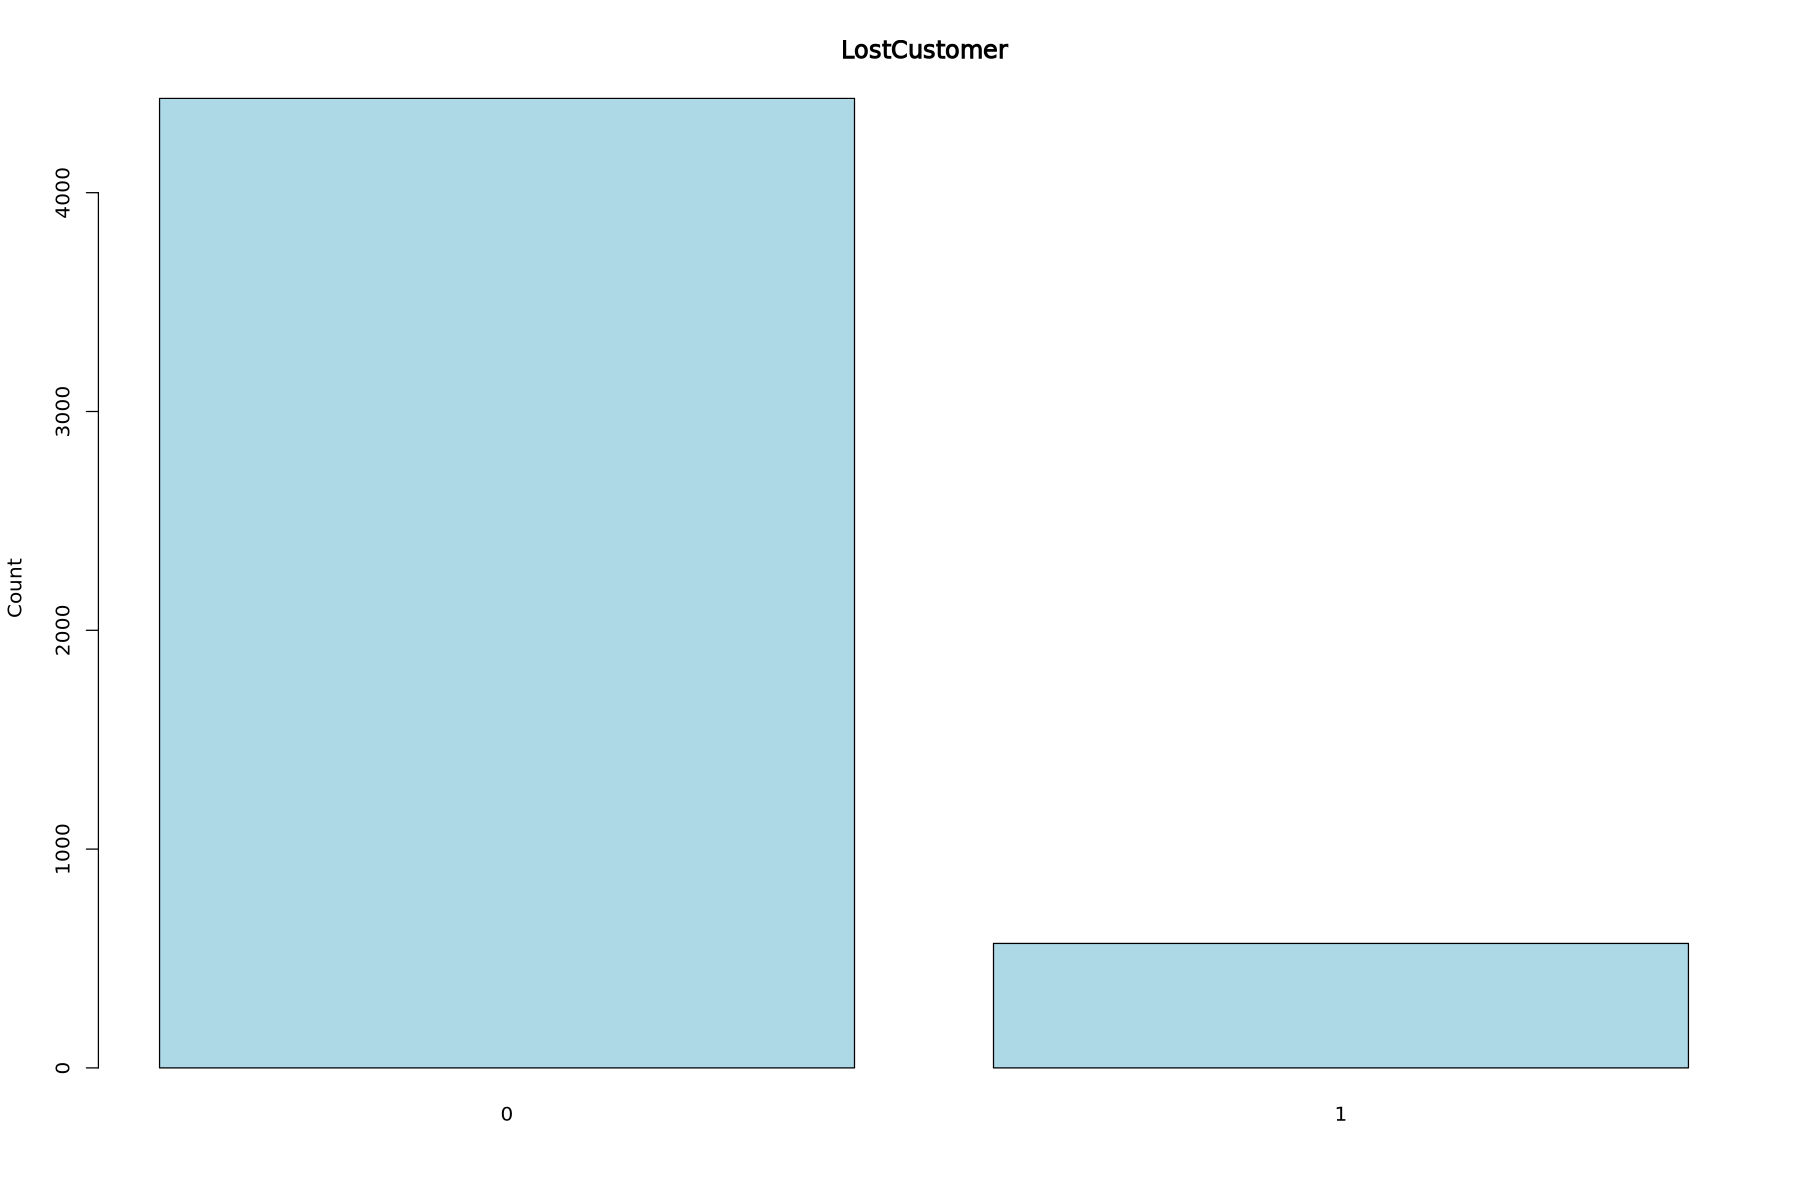

In [ ]:
# Displays the target variable distribution
barplot(table(churn_df$LostCustomer), main = "LostCustomer", ylab = "Count", col = "lightblue")


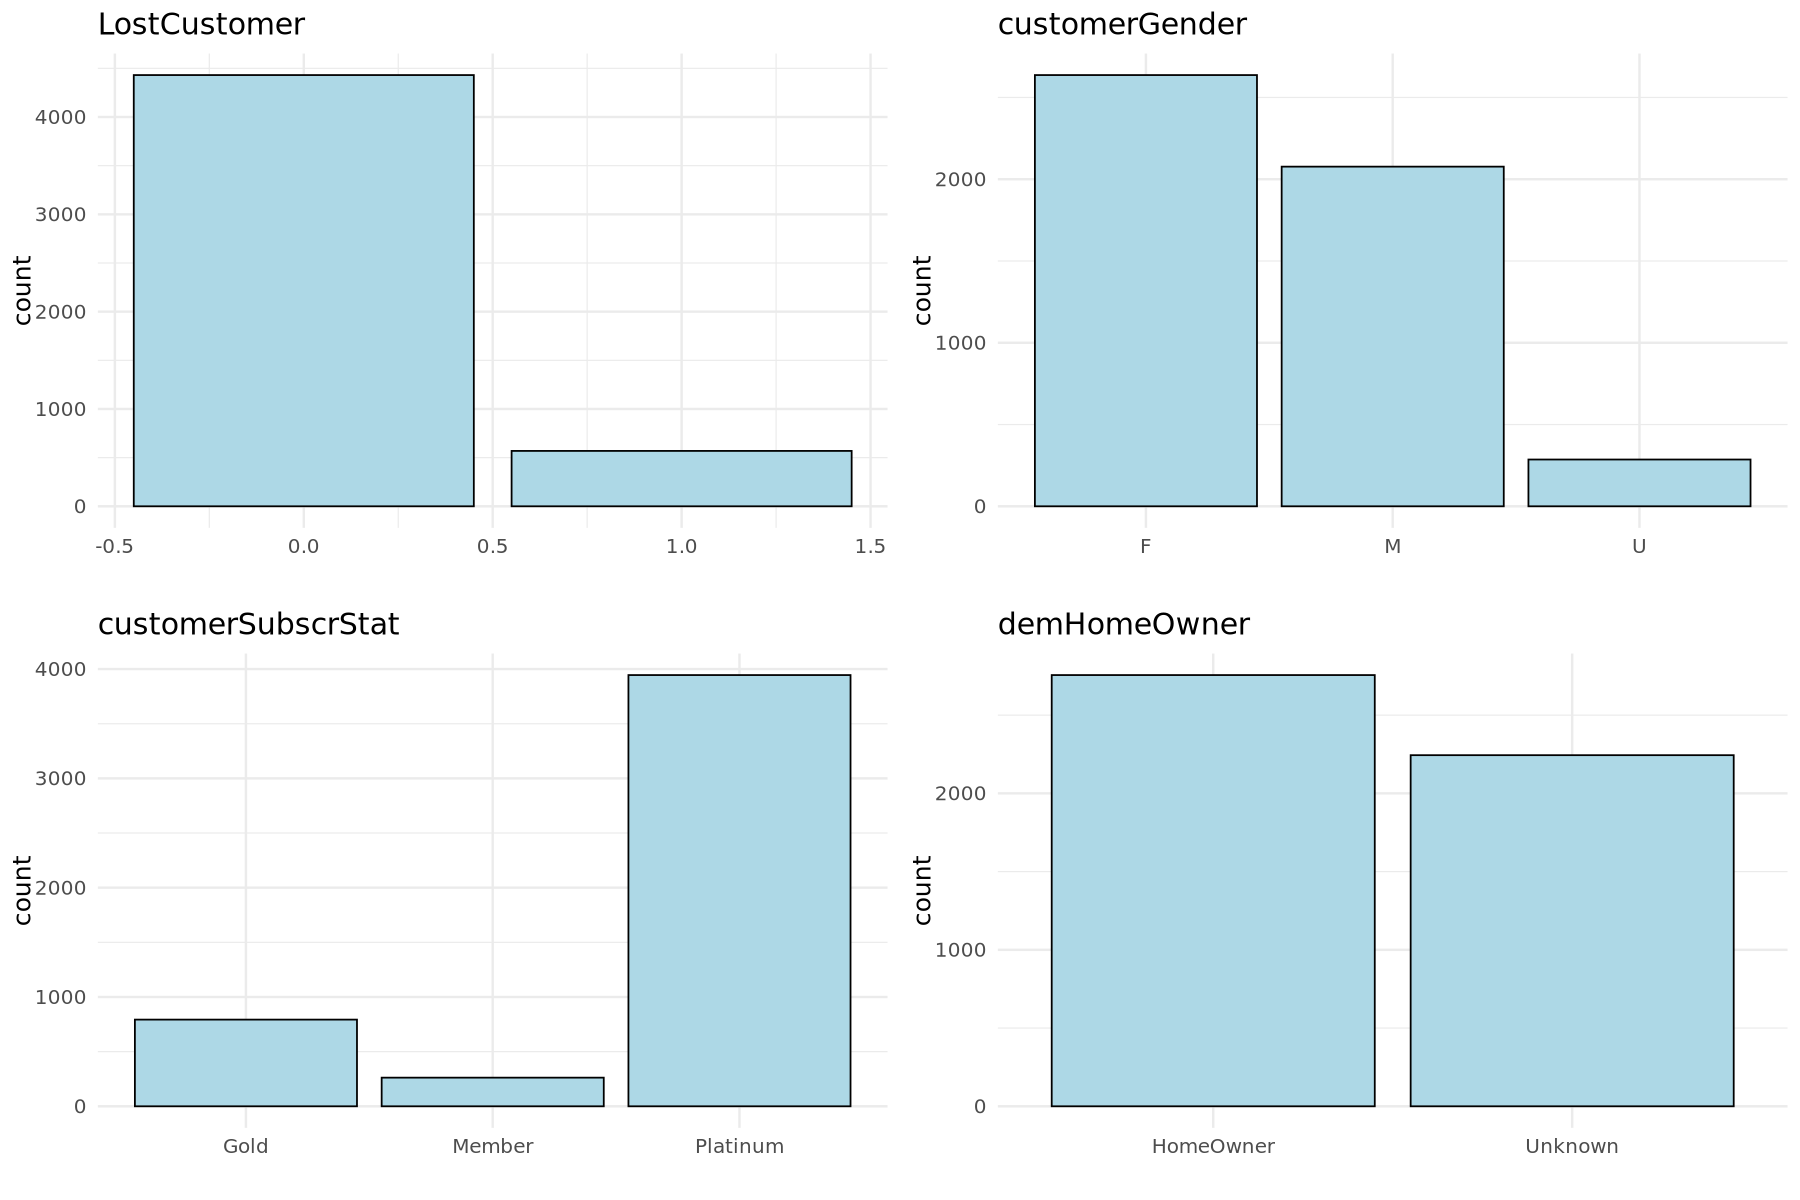

In [ ]:

count_plots <- function(data, columns, fig_per_row = 3) {
  # Determine plot dimensions
  n <- length(columns)
  nrows <- ceiling(n / fig_per_row)
  ncols <- min(n, fig_per_row)
  
  # Create individual plots
  plots <- lapply(columns, function(col) {
    ggplot(data, aes(x = .data[[col]])) +
      geom_bar(fill = "lightblue", col = "black") +
      ggtitle(col) +
      xlab("") +
      theme_minimal(base_size=15)
  })
  
  # Arrange plots into a grid
  do.call(grid.arrange, c(plots, nrow = nrows, ncol = ncols))
}

cat_count_plots <- count_plots(churn_df, c("LostCustomer", names(cat_columns)), fig_per_row = 2)


### Extreme Observations

In [ ]:
numeric_df <- churn_df[sapply(churn_df, is.numeric)]

# Compute skewness and kurtosis, skipping the first two columns
skewness <- sapply(numeric_df[, -c(1,2)], function(x) psych::skew(x))
kurtosis <- sapply(numeric_df[, -c(1,2)], function(x) psych::kurtosi(x))

In [ ]:
# Convert skewness values into a data frame for better readability
skewness_df <- data.frame(Skewness = skewness)

# Print the data frame
skewness_df

,Skewness
,<dbl>
regionPctCustomers,-0.276652952
numOfTotalReturns,1.352618085
wksSinceLastPurch,-0.769246715
basktPurchCount12Month,1.450923345
LastPurchaseAmount,20.166059316
AvgPurchaseAmount12,12.214835579
AvgPurchaseAmountTotal,10.706218221
intAdExposureCount12,1.967749505
intAdExposureCount36,-0.002562406


In [ ]:
# Convert kurtosis values into a data frame for better readability
kurtosis_df <- data.frame(Kurtosis = kurtosis)

# Print the data frame
kurtosis_df

,Kurtosis
,<dbl>
regionPctCustomers,1.1229213
numOfTotalReturns,2.1555530
wksSinceLastPurch,1.4761989
basktPurchCount12Month,3.7129832
LastPurchaseAmount,662.3306929
AvgPurchaseAmount12,268.1775276
AvgPurchaseAmountTotal,195.9500283
intAdExposureCount12,4.6625854
intAdExposureCount36,0.6048980


In [ ]:
# Selecting highly non-normal columns
high_skewness <- skewness[abs(skewness) > 3]
high_kurtosis <- kurtosis[abs(kurtosis) > 3]


In [ ]:
# Display results with proper formatting

cat("----------SKEWNESS----------", end = "\n\n")
#high_skewness
data.frame(high_skewness) #better readibility


cat("----------KURTOSIS----------", end = "\n\n")
#high_kurtosis
data.frame(high_kurtosis) #better readibility

# Identify columns that are highly skewed and have high kurtosis
cat("----------HIGH BOTH----------", end = "\n\n")
skewed_cols <- intersect(names(high_skewness), names(high_kurtosis))
#skewed_cols
data.frame(skewed_cols) #better readibility


----------SKEWNESS---------- 



,high_skewness
,<dbl>
LastPurchaseAmount,20.166059
AvgPurchaseAmount12,12.214836
AvgPurchaseAmountTotal,10.706218
avgDiscountValue12,13.082118
customersales,19.225607
AvgPurchasePerAd,3.676631


----------KURTOSIS---------- 



,high_kurtosis
,<dbl>
basktPurchCount12Month,3.712983
LastPurchaseAmount,662.330693
AvgPurchaseAmount12,268.177528
AvgPurchaseAmountTotal,195.950028
intAdExposureCount12,4.662585
socialMediaAdCount12,4.801158
totalNumProdPurchased,4.618117
avgDiscountValue12,263.770842
customersales,409.274306


----------HIGH BOTH---------- 



skewed_cols
<chr>
LastPurchaseAmount
AvgPurchaseAmount12
AvgPurchaseAmountTotal
avgDiscountValue12
customersales
AvgPurchasePerAd


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Removed 1382 rows containing non-finite outside the scale range (`stat_bin()`).”


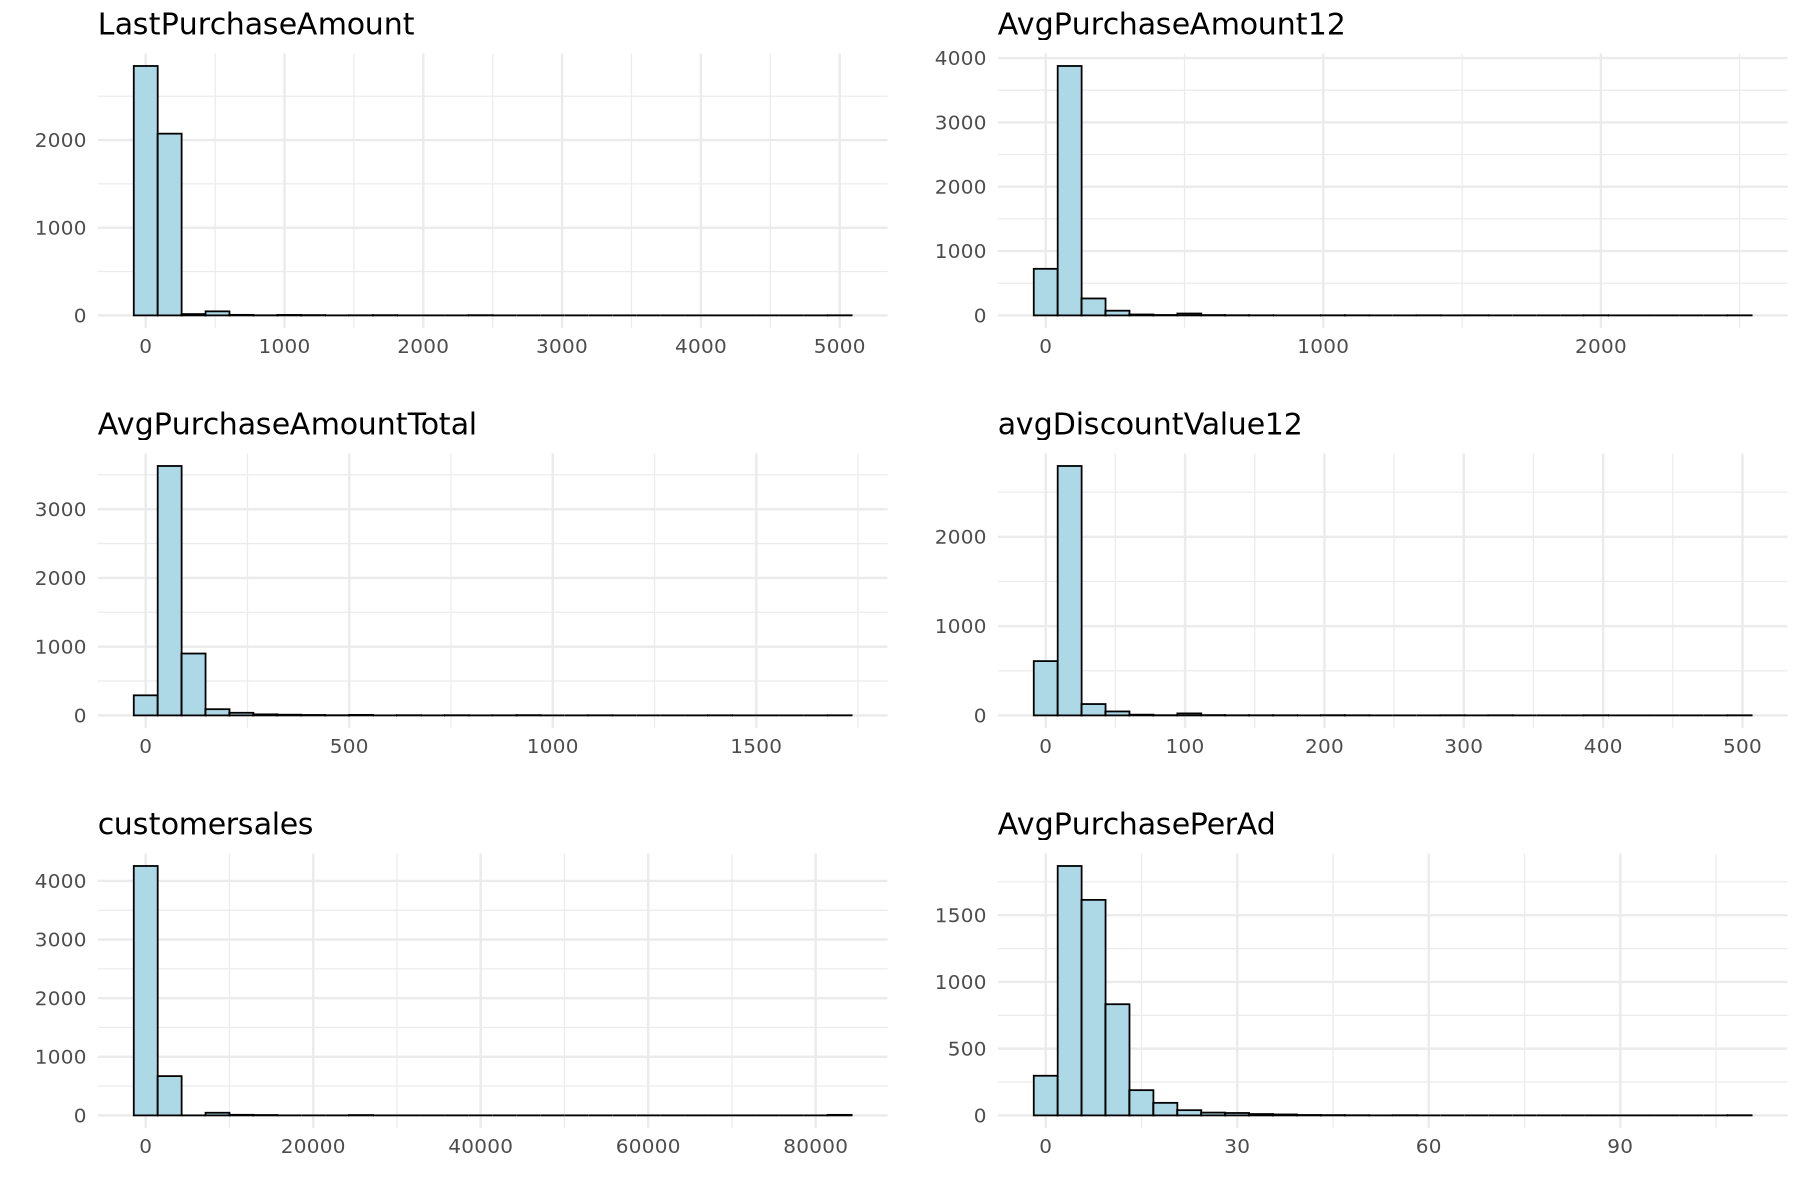

In [ ]:
# Create a list to store individual histograms
hist_list <- lapply(skewed_cols, function(col) {
  ggplot(churn_df, aes_string(x = col)) +
    geom_histogram(fill = "lightblue", color = "black", bins = 30) +
    ggtitle(col) +
    xlab("")+
    ylab("")+
    theme_minimal(base_size=15)
})

# Arrange the histograms in a grid (2 rows, 3 columns)
grid.arrange(grobs = hist_list, nrow = 3, ncol = 2)

Warning message:
“Removed 1382 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


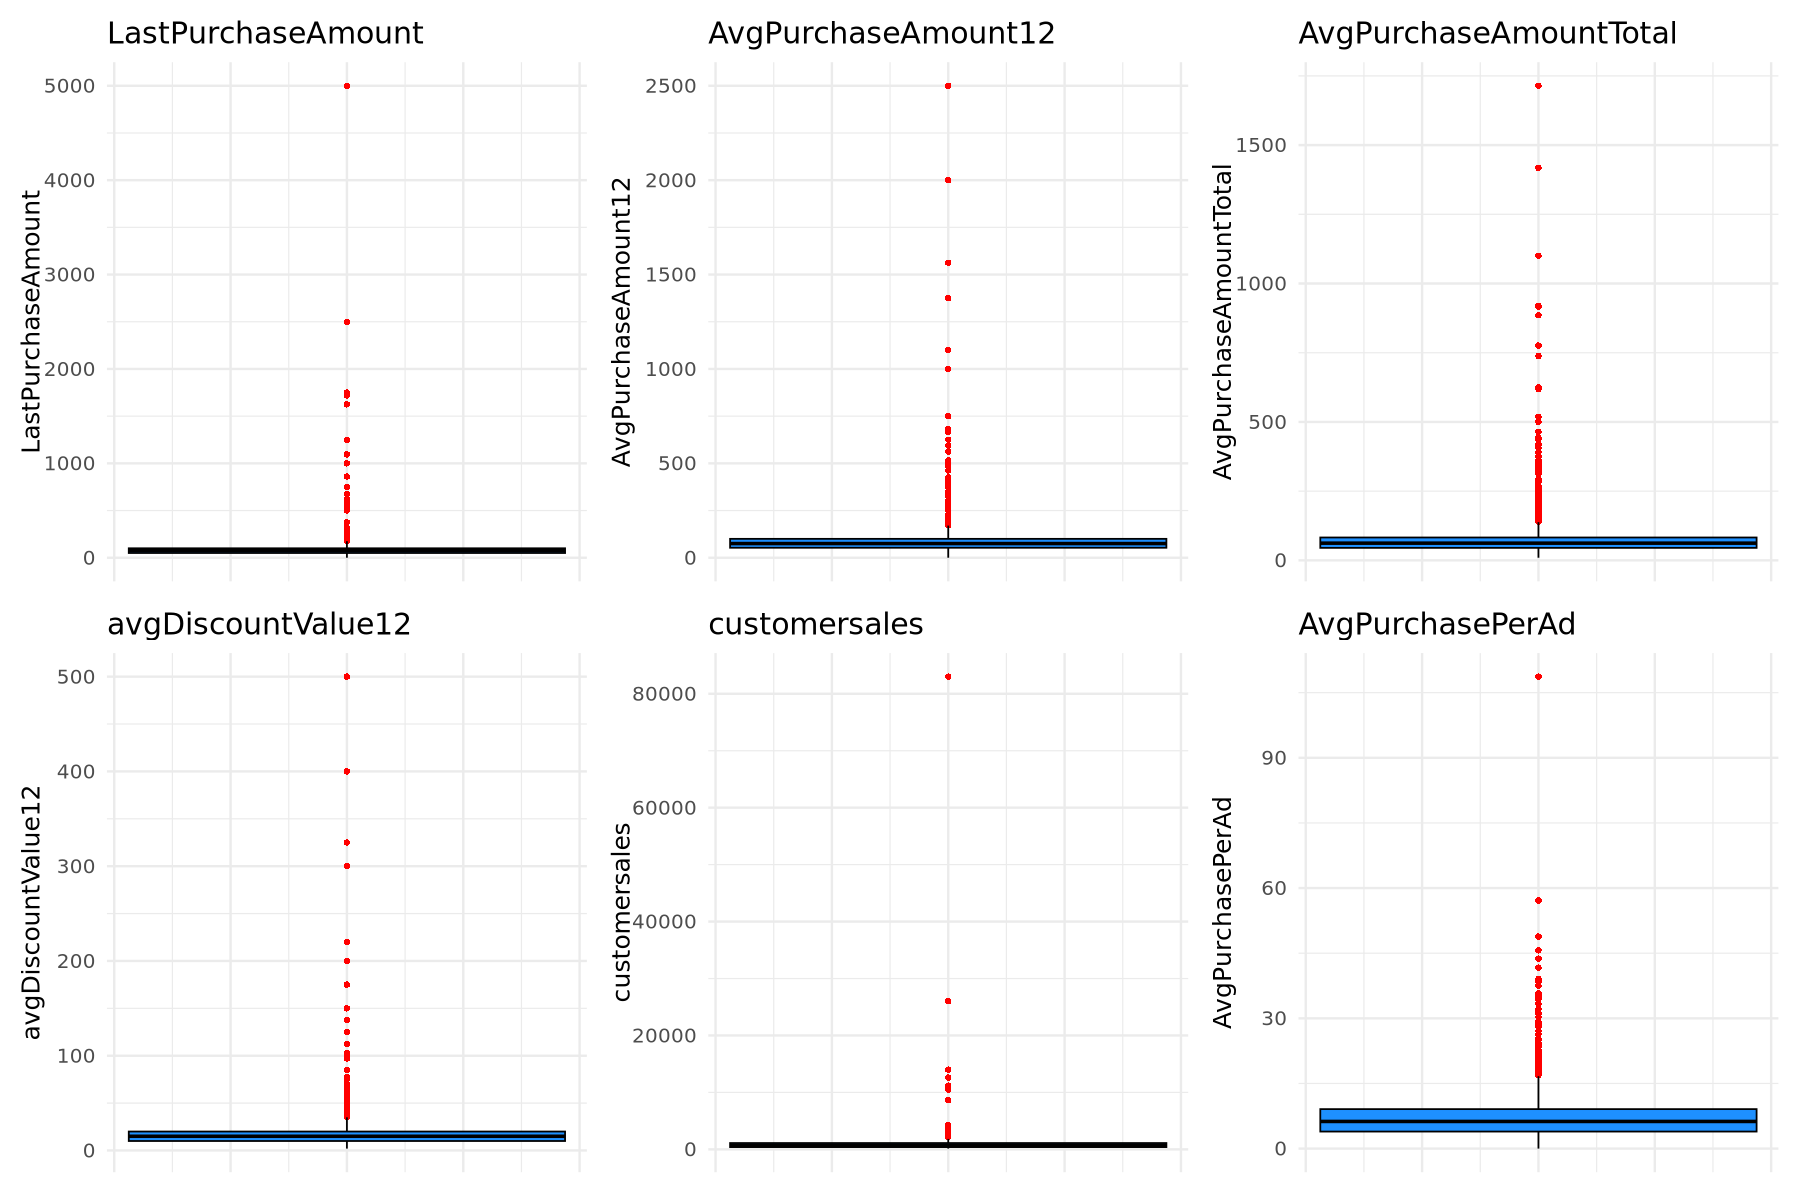

In [ ]:
box_plots <- function(data, columns, fig_per_row = 3) {
  # Determine number of rows and columns for layout
  num_cols <- length(columns)
  nrows <- ceiling(num_cols / fig_per_row)
  ncols <- min(fig_per_row, num_cols)

  # Generate boxplots for selected columns
  plot_list <- lapply(columns, function(col) {
    ggplot(data, aes(y = .data[[col]])) +
      geom_boxplot(fill = "dodgerblue", color = "black", outlier.color = "red", outlier.shape = 16) +
      ggtitle(col) +
      theme_minimal(base_size = 15) +
      theme(
        axis.text.x = element_blank(),  
        axis.ticks.x = element_blank()
      ) +
      labs(y = col)
  })

  # Arrange plots in a grid (adjust layout dynamically)
  combined_plot <- wrap_plots(plot_list) + plot_layout(nrow = nrows, ncol = ncols)

  return(combined_plot)
}

# Example usage:
box_plots(churn_df, skewed_cols)


### Explore Missingness

In [ ]:
# Count missing values (NA or "") for each column
missing <- sapply(churn_df, function(col) {
  sum(is.na(col) | col == "")
}) / nrow(churn_df)

# Keep only columns where missing proportion > 0
missing <- missing[missing > 0]

# Convert to data frame
missing_df <- data.frame(missing)

print(missing_df)


                   missing
avgDiscountValue12  0.2764
techSupportEval     0.0540
Review_Text         0.8436
Title               0.8656
customerAge         0.2518


In [ ]:
# Print data types of columns with missing values
col_missing <- data.frame(type = sapply(churn_df[names(missing)], class))
col_missing

# Display first few rows of the selected columns
head(churn_df[names(missing)])

,type
,<chr>
avgDiscountValue12,numeric
techSupportEval,numeric
Review_Text,character
Title,character
customerAge,numeric


,avgDiscountValue12,techSupportEval,Review_Text,Title,customerAge
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,NA,3,NA,NA,20
2,15,3,NA,NA,51
3,NA,2,NA,NA,19
4,8,2,NA,NA,19
5,NA,2,NA,NA,23
6,NA,2,NA,NA,19


Warning message:
“Removed 1382 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 270 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 1259 rows containing non-finite outside the scale range (`stat_bin()`).”


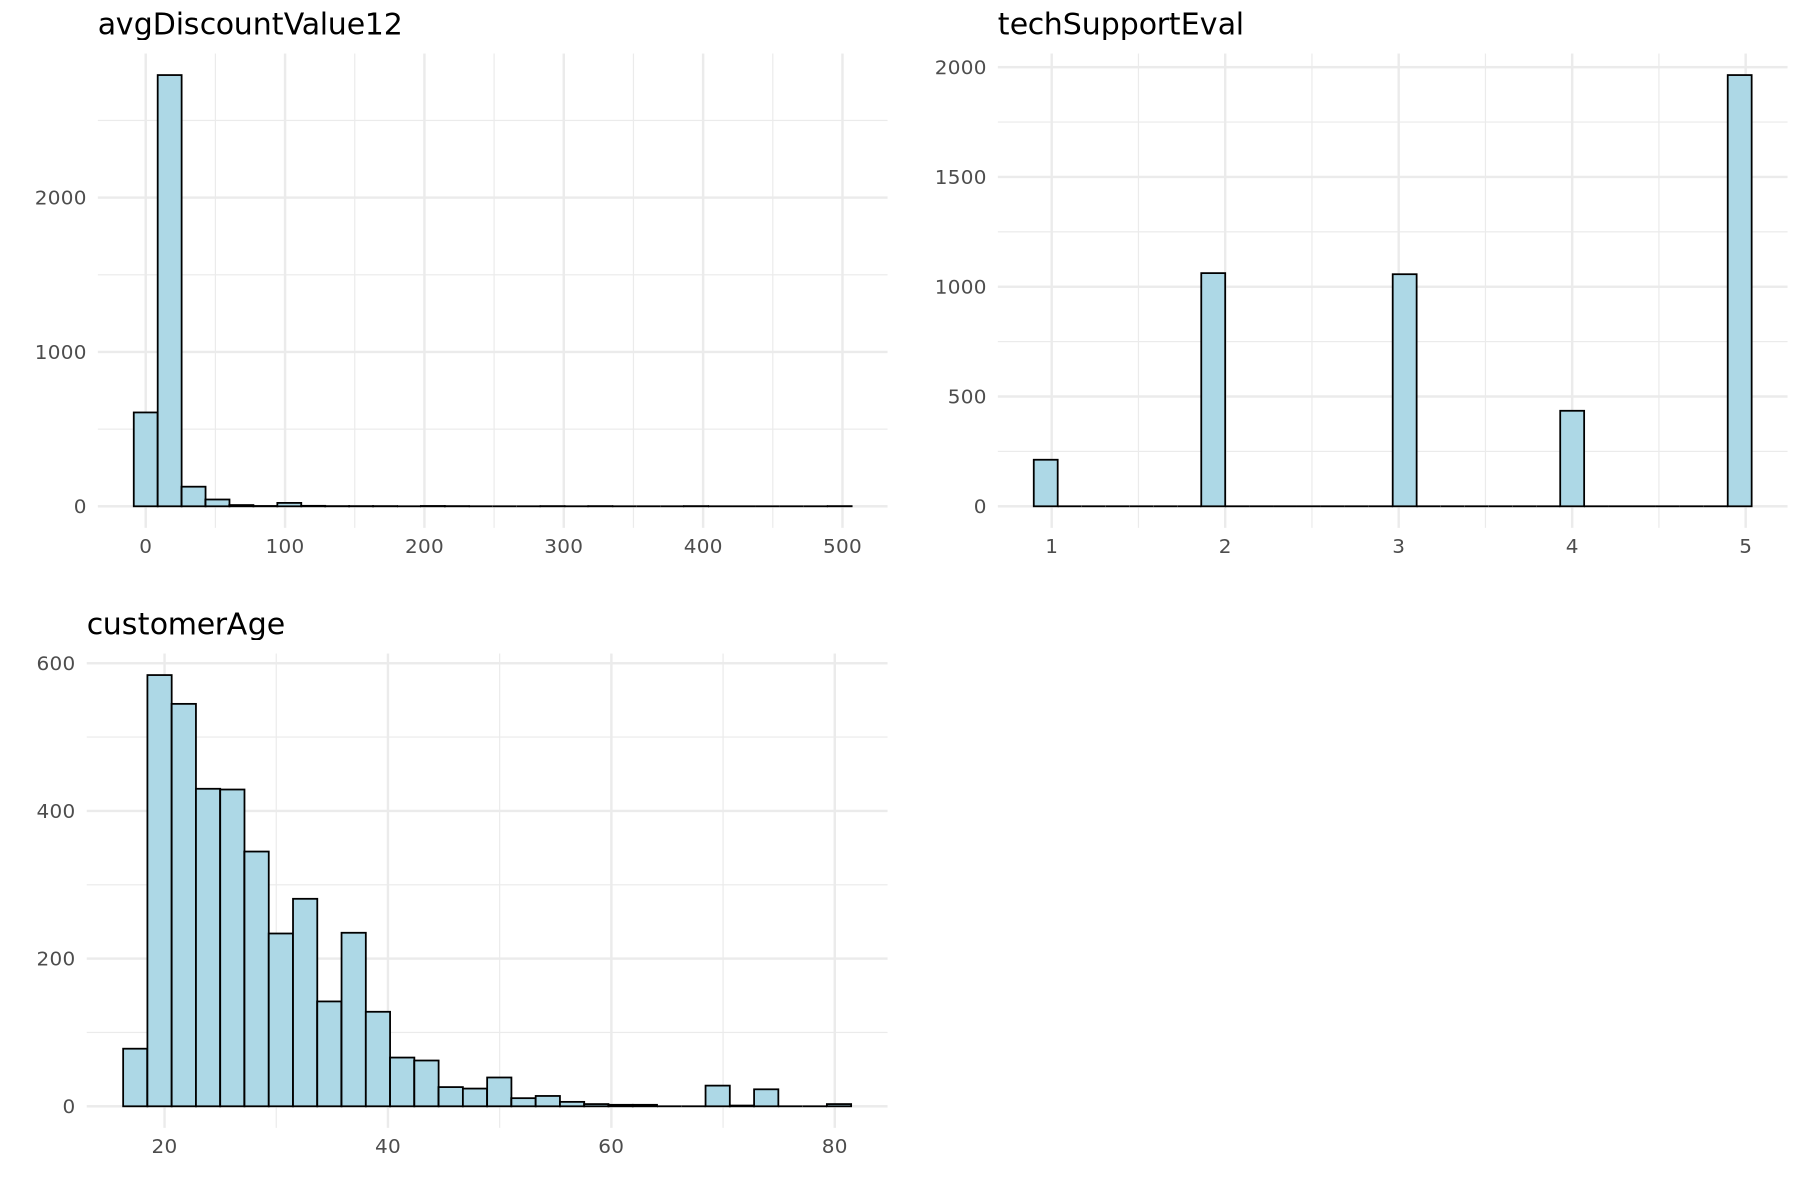

In [ ]:
num_missing <-  row.names(col_missing %>% filter(type == "numeric"))

# Create individual ggplot histograms
plot_list <- lapply(num_missing, function(col) {
  ggplot(churn_df, aes(x = .data[[col]])) +
    geom_histogram(fill = "lightblue", color = "black", bins = 30) +
    ggtitle(col) +
    xlab("") +
    ylab("") +
    theme_minimal(base_size=15)
})

# Arrange in 2x2 grid
grid.arrange(grobs = plot_list, ncol = 2)


In [ ]:
# Compute correlation matrix (excluding non-numeric columns)
corr_df <- cor(numeric_df, use = "pairwise.complete.obs")

# Set diagonal values to NA
diag(corr_df) <- NA

# Select rows with high correlations (absolute value > 0.9)
high_corr <- ifelse(abs(corr_df) > 0.9, corr_df, NA)

# Convert to data frame for easier manipulation
high_corr <- as.data.frame(high_corr)

# Drop rows and columns where all values are NA
high_corr <- high_corr[rowSums(!is.na(high_corr)) > 0, colSums(!is.na(high_corr)) > 0]

# View result
#print(high_corr)
high_corr #better readibility

,AvgPurchaseAmount12,intAdExposureCountAll,socialMediaAdCountAll,avgDiscountValue12
,<dbl>,<dbl>,<dbl>,<dbl>
AvgPurchaseAmount12,NA,NA,NA,0.9820429
intAdExposureCountAll,NA,NA,0.9459626,NA
socialMediaAdCountAll,NA,0.9459626,NA,NA
avgDiscountValue12,0.9820429,NA,NA,NA


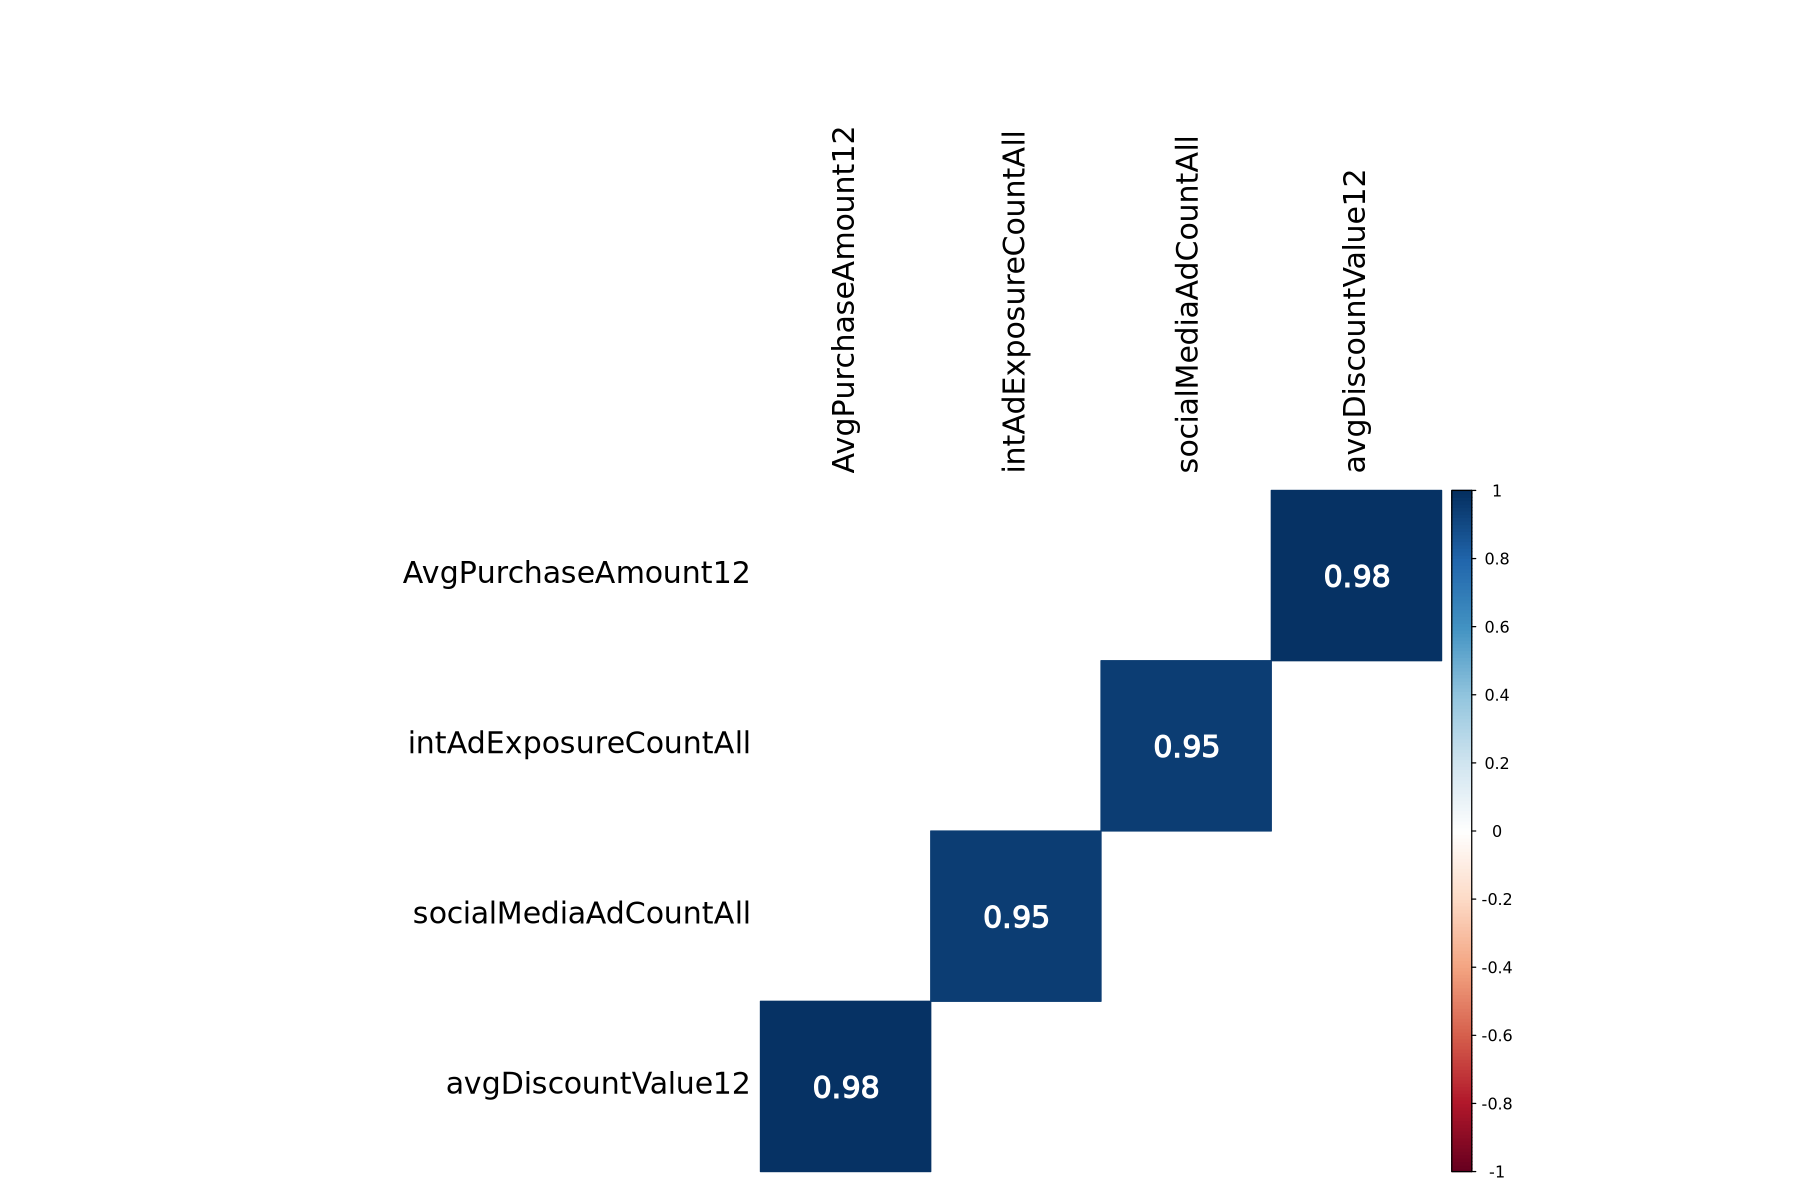

In [ ]:
# Generate a heatmap with correlation values
corrplot(as.matrix(high_corr), 
         method = "color",    
         addCoef.col = "white",    
         tl.col = "black",        
         na.label = " ",
         tl.cex = 1.5,          
         number.cex = 1.5)   
